# 1. Présentation du module de classification dans PyCaret

Le module de classification de PyCaret ( pycaret.classification) est un module d'apprentissage automatique supervisé qui est utilisé pour classer les éléments dans un groupe binaire basé sur diverses techniques et algorithmes. Certains cas d'utilisation courants de problèmes de classification incluent la prédiction du défaut du client (oui ou non), le taux de désabonnement des clients (le client partira ou restera), la maladie trouvée (positive ou négative).

Le module de classification PyCaret peut être utilisé pour les problèmes de classification binaire ou multi-classes. Il a plus de 18 algorithmes et 14 graphiques pour analyser les performances des modèles. Qu'il s'agisse de réglage d'hyperparamètres, d'assemblage ou de techniques avancées comme l'empilement, le module de classification de PyCaret a tout pour plaire

# 2. Jeu de données

In [1]:
import pandas as pd
from pycaret.classification import *

In [2]:
df = pd.read_csv('data/bigml.csv')

In [3]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.shape

(3333, 21)

In [5]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [6]:
df.describe(include=['O'])

,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,382-4657,no,no
freq,106,1,3010,2411


In [7]:
df = df.drop('phone number', axis=1)
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Afin de démontrer la predict_model()fonction sur des données invisibles, un échantillon de 167 enregistrements a été retenu de l'ensemble de données d'origine pour être utilisé pour les prédictions. Cela ne doit pas être confondu avec une séparation train/test car cette séparation particulière est effectuée pour simuler un scénario réel. Une autre façon de penser à cela est que ces 167 enregistrements ne sont pas disponibles au moment où l'expérience d'apprentissage automatique a été réalisée

In [8]:
data = df.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = df.drop(data.index).reset_index(drop=True)

print('Données pour la modélisation: ' + str(data.shape))
print('Données invisibles pour les prédictions: ' + str(data_unseen.shape))

Données pour la modélisation: (3166, 20)
Données invisibles pour les prédictions: (167, 20)


# 3. Configuration de l'environnement dans PyCaret

La setup()fonction initialise l'environnement dans pycaret et crée le pipeline de transformation pour préparer les données pour la modélisation et le déploiement. setup()doit être appelé avant d'exécuter toute autre fonction dans pycaret. Il prend deux paramètres obligatoires : une dataframe pandas et le nom de la colonne cible. Tous les autres paramètres sont facultatifs et sont utilisés pour personnaliser le pipeline de prétraitement.

Lorsqu'il setup()est exécuté, l'algorithme d'inférence de PyCaret déduira automatiquement les types de données pour toutes les fonctionnalités en fonction de certaines propriétés. Le type de données doit être déduit correctement, mais ce n'est pas toujours le cas. Pour tenir compte de cela, PyCaret affiche un tableau contenant les fonctionnalités et leurs types de données déduits après setup()l'exécution. Si tous les types de données sont correctement identifiés, entervous pouvez appuyer sur pour continuer ou quittaper pour terminer l'expérience. S'assurer que les types de données sont corrects est d'une importance fondamentale dans PyCaret car il effectue automatiquement quelques tâches de prétraitement qui sont impératives pour toute expérience d'apprentissage automatique. Ces tâches sont effectuées différemment pour chaque type de données, ce qui signifie qu'il est très important qu'elles soient correctement configurées.

In [9]:
df_setup = setup(data = data, target = 'churn', session_id=123) 

,Description,Value
0,session_id,123
1,Target,churn
2,Target Type,Binary
3,Label Encoded,"False: 0, True: 1"
4,Original Data,"(3166, 20)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


Une fois la configuration exécutée avec succès, elle imprime la grille d'informations qui contient plusieurs informations importantes. La plupart des informations sont liées au pipeline de prétraitement qui est construit lors de setup()son exécution. 

La majorité de ces fonctionnalités sont hors de portée pour nos besoins , mais quelques points importants à noter à ce stade incluent :

- Target Type : Binaire ou Multiclasse. Le type de cible est automatiquement détecté et affiché. Il n'y a aucune différence dans la façon dont l'expérience est effectuée pour les problèmes binaires ou multiclasses. Toutes les fonctionnalités sont identiques.

- Missing values : lorsqu'il y a des valeurs manquantes dans les données d'origine, cela s'affichera comme vrai. Pour cette expérience, il n'y a pas de valeurs manquantes dans l'ensemble de données.

- Numeric Features :  le nombre d'entités déduites comme numériques. Dans cet ensemble de données, 13 caractéristiques sur 21 sont déduites comme numériques.

- Categorical Features : le nombre d'entités déduites comme catégorielles. Dans cet ensemble de données, 6 caractéristiques sur 21 sont déduites comme catégorielle

- Transformed Train Set :  affiche la forme de l'ensemble d'entraînement transformé. Notez que la forme originale de (3166, 21) est transformée en (2216, 95) pour la rame transformée et que le nombre d'entités est passé de 24 à 95 en raison de l'encodage catégoriel

- Transformed Test Set : affiche la forme de l'ensemble de test transformé. Il y a 950 échantillons dans l'ensemble test. Cette répartition est basée sur la valeur par défaut de 70/30.

# 4. Comparaison de tous les modèles

La comparaison de tous les modèles pour évaluer les performances est le point de départ recommandé pour la modélisation une fois la configuration terminée.

Cette fonction forme tous les modèles de la bibliothèque de modèles et les note à l'aide d'une validation croisée stratifiée pour l'évaluation des métriques. La sortie imprime une grille de score qui montre la précision moyenne, l'AUC, le rappel, la précision, F1 et Kappa sur les plis (10 par défaut) de tous les modèles disponibles dans la bibliothèque de modèles.

In [10]:
compare_models ()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9463,0.8897,0.6761,0.9244,0.7772,0.7476,0.7617,0.0950
gbc,Gradient Boosting Classifier,0.9431,0.9023,0.6826,0.8882,0.7695,0.7378,0.7475,0.4450
rf,Random Forest Classifier,0.9071,0.8857,0.3686,0.9233,0.5174,0.4778,0.5433,0.2830
dt,Decision Tree Classifier,0.9066,0.8153,0.6888,0.6596,0.6714,0.6172,0.6190,0.0330
et,Extra Trees Classifier,0.8949,0.8793,0.2978,0.8648,0.4381,0.3956,0.4662,0.3100
knn,K Neighbors Classifier,0.8786,0.6565,0.2494,0.6772,0.3618,0.3109,0.3595,0.0850
ada,Ada Boost Classifier,0.8768,0.8195,0.3527,0.6042,0.4442,0.3802,0.3984,0.1530
ridge,Ridge Classifier,0.8651,0.0000,0.1781,0.5648,0.2667,0.2143,0.2596,0.0160
lr,Logistic Regression,0.8637,0.8306,0.2266,0.5326,0.3158,0.2537,0.2833,1.8430
dummy,Dummy Classifier,0.8606,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0080


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# 5. Créer un modèle

Bien compare_models()qu'il s'agisse d'une fonction puissante et souvent d'un point de départ dans toute expérience, elle ne renvoie aucun modèle entraîné. Le flux de travail d'expérimentation recommandé par PyCaret consiste à utiliser compare_models()juste après la configuration pour évaluer les modèles les plus performants et finaliser quelques candidats pour une expérimentation continue. En tant que telle, la fonction qui vous permet réellement de créer un modèle s'appelle sans imagination create_model(). Cette fonction crée un modèle et le note à l'aide d'une validation croisée stratifiée.

nous travaillerons avec les modèles ci-dessous comme modèles candidats. Les sélections sont uniquement à des fins d'illustration et ne signifient pas nécessairement qu'elles sont les plus performantes ou idéales pour ce type de données.

- Classificateur d'arbre de décision ('dt')
- Classificateur de voisins K ('knn')
- Classificateur de forêt aléatoire ('rf')

#### 4.1 Classificateur d'arbre de décision

In [11]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8874,0.7994,0.6774,0.5833,0.6269,0.5610,0.5632
1,0.9144,0.8827,0.8387,0.6500,0.7324,0.6824,0.6903
2,0.9009,0.7803,0.6129,0.6552,0.6333,0.5761,0.5765
3,0.9414,0.8714,0.7742,0.8000,0.7869,0.7530,0.7531
4,0.9144,0.8422,0.7419,0.6765,0.7077,0.6577,0.6586
5,0.8919,0.7615,0.5806,0.6207,0.6000,0.5376,0.5380
6,0.8733,0.7300,0.5333,0.5333,0.5333,0.4600,0.4600
7,0.9186,0.8042,0.6452,0.7407,0.6897,0.6430,0.6451
8,0.9095,0.8529,0.7742,0.6486,0.7059,0.6529,0.6565


In [12]:
#l'objet modèle formé est stocké dans la variable 'dt'
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


#### 4.2 K Neighbors Classifier

In [13]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8829,0.7039,0.2258,0.7778,0.3500,0.3064,0.3784
1,0.8964,0.6897,0.3226,0.8333,0.4651,0.4199,0.4784
2,0.8649,0.6355,0.1290,0.5714,0.2105,0.1677,0.2248
3,0.8739,0.5453,0.2581,0.6154,0.3636,0.3064,0.3423
4,0.8694,0.6534,0.2581,0.5714,0.3556,0.2942,0.3232
5,0.8919,0.6833,0.2903,0.8182,0.4286,0.3835,0.4470
6,0.8778,0.7366,0.3000,0.6000,0.4000,0.3403,0.3657
7,0.8914,0.6458,0.2903,0.8182,0.4286,0.3833,0.4468
8,0.8778,0.6467,0.2581,0.6667,0.3721,0.3188,0.3632


#### 4.3  Random Forest Classifier

In [14]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9099,0.9147,0.4194,0.8667,0.5652,0.5217,0.5646
1,0.9054,0.9284,0.4839,0.7500,0.5882,0.5376,0.5541
2,0.8919,0.8217,0.2258,1.0000,0.3684,0.3342,0.4479
3,0.9099,0.9342,0.3548,1.0000,0.5238,0.4862,0.5667
4,0.9189,0.8360,0.4516,0.9333,0.6087,0.5695,0.6164
5,0.8784,0.9196,0.1935,0.7500,0.3077,0.2656,0.3405
6,0.9005,0.8053,0.2667,1.0000,0.4211,0.3860,0.4890
7,0.9186,0.8940,0.4194,1.0000,0.5909,0.5539,0.6189
8,0.9186,0.8877,0.4194,1.0000,0.5909,0.5539,0.6189


# 6. Optimisation des modèles

Lorsqu'un modèle est créé à l'aide de la create_model() fonction, il utilise les hyperparamètres par défaut. Afin d'ajuster les hyperparamètres, la tune_model() fonction est utilisée. Cette fonction ajuste automatiquement les hyperparamètres d'un modèle sur un espace de recherche prédéfini et le note à l'aide d'une validation croisée stratifiée. La sortie imprime une grille de score qui affiche la précision, l'AUC, le rappel, la précision, le F1 et le Kappa par pli.

Remarque : tune_model() ne prend pas un objet de modèle formé comme entrée. Il nécessite à la place qu'un nom de modèle soit transmis sous la forme d'une chaîne abrégée similaire à la façon dont il est transmis dans create_model(). Toutes les autres fonctions dans pycaret.classificationnécessitent un objet de modèle entraîné comme argument.

#### 6.1 Classificateur d'arbre de décision

In [16]:
tuned_dt  =  tune_model (dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9279,0.9264,0.5484,0.8947,0.6800,0.6420,0.6665
1,0.9459,0.8982,0.8387,0.7879,0.8125,0.7810,0.7815
2,0.9279,0.7902,0.6129,0.8261,0.7037,0.6637,0.6733
3,0.9640,0.8661,0.7742,0.9600,0.8571,0.8368,0.8431
4,0.9414,0.8796,0.6774,0.8750,0.7636,0.7308,0.7386
5,0.9279,0.8463,0.5806,0.8571,0.6923,0.6532,0.6691
6,0.9186,0.8140,0.5000,0.8333,0.6250,0.5825,0.6065
7,0.9502,0.8733,0.6452,1.0000,0.7843,0.7577,0.7809
8,0.9593,0.8649,0.7419,0.9583,0.8364,0.8135,0.8222


#### 6.2 Random Forest Classifier

In [17]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9324,0.8898,0.5806,0.9000,0.7059,0.6697,0.6903
1,0.9369,0.8735,0.7419,0.7931,0.7667,0.7303,0.7308
2,0.9189,0.8019,0.4839,0.8824,0.6250,0.5838,0.6171
3,0.9595,0.8723,0.7419,0.9583,0.8364,0.8137,0.8223
4,0.9459,0.8794,0.6774,0.9130,0.7778,0.7478,0.7586
5,0.9099,0.8105,0.4194,0.8667,0.5652,0.5217,0.5646
6,0.9050,0.8291,0.4000,0.8000,0.5333,0.4869,0.5233
7,0.9412,0.9216,0.6452,0.9091,0.7547,0.7224,0.7361
8,0.9457,0.8756,0.6774,0.9130,0.7778,0.7476,0.7584


#### 6.3  K Neighbors Classifier

In [18]:
tuned_knn = tune_model(knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8919,0.7791,0.2581,0.8889,0.4000,0.3598,0.4443
1,0.9009,0.6983,0.2903,1.0000,0.4500,0.4131,0.5102
2,0.8739,0.6545,0.1290,0.8000,0.2222,0.1908,0.2892
3,0.8829,0.5904,0.2581,0.7273,0.3810,0.3321,0.3871
4,0.9009,0.6723,0.2903,1.0000,0.4500,0.4131,0.5102
5,0.8694,0.7083,0.0968,0.7500,0.1714,0.1441,0.2385
6,0.8869,0.7207,0.2000,0.8571,0.3243,0.2877,0.3809
7,0.8959,0.6441,0.2581,1.0000,0.4103,0.3742,0.4798
8,0.8869,0.7220,0.2581,0.8000,0.3902,0.3455,0.4136


On remarque que les résultats après le réglage ont été améliorés :

- Classificateur d'arbre de décision (Avant : 0.9066, Après : 0.9413)
- Classificateur de Voisins K Avant : (0.8786, Après : 0.8867)
- Classificateur de forêt aléatoire (Avant : 0.9071, Après : 0.9332)


# 7. Tracer un modèle

Avant la finalisation du modèle, la plot_model() fonction peut être utilisée pour analyser les performances sur différents aspects tels que AUC, confusion_matrix, limite de décision, etc. Cette fonction prend un objet de modèle formé et renvoie un tracé basé sur l'ensemble test.

#### 7.1 Tracé AUC 

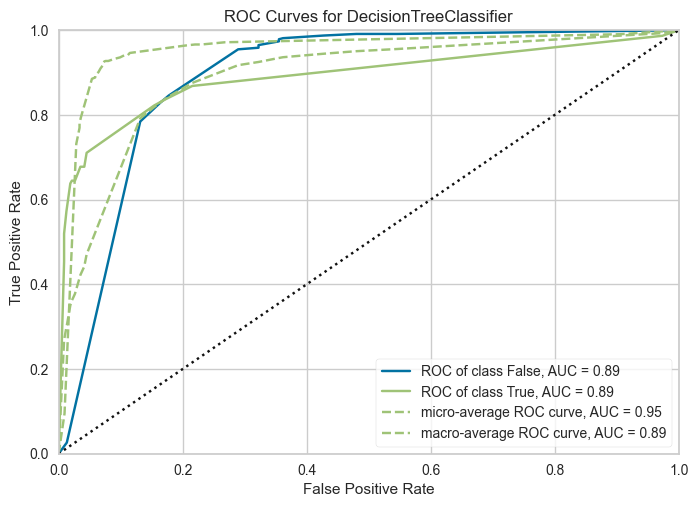

In [23]:
plot_model ( tuned_dt ,  plot  =  'auc' )

#### 7.2 Courbe de précision-rappel 

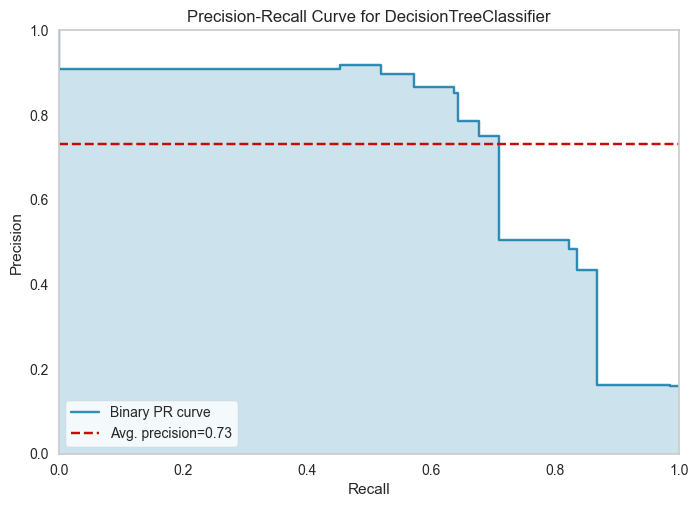

In [24]:
plot_model ( tuned_dt ,  plot  =  'pr' )

#### 7.3 Tracé de l'importance des features

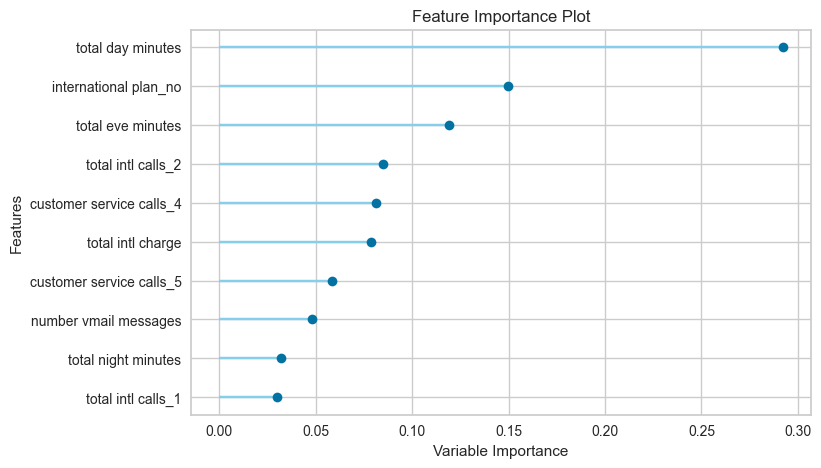

In [25]:
plot_model ( tuned_dt ,  plot = 'feature' )

#### 7.4 Matrice de confusion 

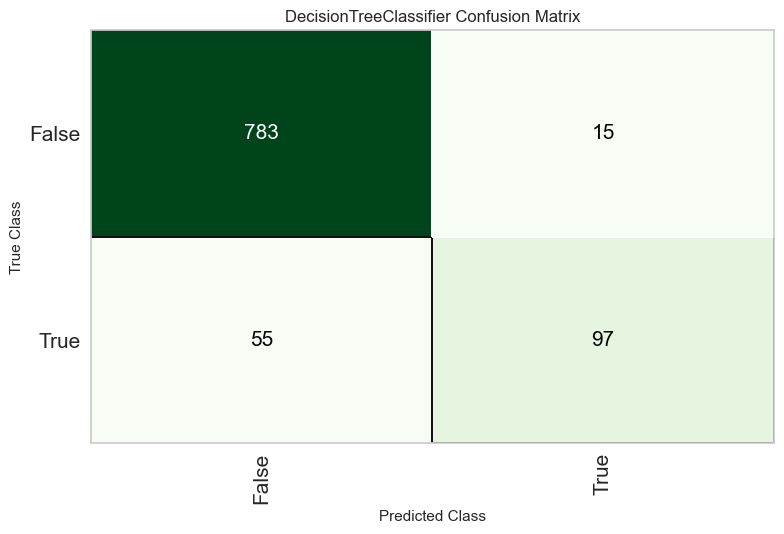

In [26]:
plot_model ( tuned_dt ,  plot  =  'confusion_matrix' )

Une autre façon d'analyser les performances des modèles consiste à utiliser la evaluate_model()fonction qui affiche une interface utilisateur pour tous les tracés disponibles pour un modèle donné. plot_model()Il utilise la fonction en interne .

In [27]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 8. Prédiction  sur l'ensemble test

Avant de finaliser le modèle, il est conseillé d'effectuer une dernière vérification en prédisant l'ensemble test et en examinant les métriques d'évaluation.

In [28]:
predict_model(tuned_dt);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9263,0.8903,0.6382,0.8661,0.7348,0.6932,0.7041


La précision sur l'ensemble test est 0.9263 comparée à celle obtenue sur les tuned_dt 0.9413. Ce n'est pas une différence significative. S'il y a une grande variation entre les résultats du test et du train, cela indiquerait normalement un over-fitting, mais pourrait également être dû à plusieurs autres facteurs et nécessiterait une enquête plus approfondie. Dans ce cas, nous poursuivrons avec la finalisation du modèle et la prédiction sur des données inédites (les 5 % que nous avions séparés au début et jamais exposés à PyCaret).

# 9.  Finalisation du modèle pour le déploiement

La finalisation du modèle est la dernière étape. Un flux de travail normal d'apprentissage automatique dans PyCaret commence par setup(), suivi de la comparaison de tous les modèles à l'aide compare_models()et de la présélection de quelques modèles candidats (basés sur la métrique d'intérêt) pour effectuer plusieurs techniques de modélisation telles que le réglage d'hyperparamètres, l'assemblage, l'empilement, etc. Ce flux de travail finira par conduire nous au meilleur modèle à utiliser pour faire des prédictions sur des données nouvelles et inédites. La finalize_model() fonction adapte le modèle à l'ensemble de données complet, y compris l'échantillon test (30 % dans ce cas). Le but de cette fonction est de former le modèle sur l'ensemble de données complet avant qu'il ne soit déployé.

In [29]:
final_dt = finalize_model(tuned_dt)

In [30]:
print(final_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [31]:
predict_model(final_dt);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9411,0.9131,0.7632,0.8529,0.8056,0.7709,0.7726


# 10. Predication sur data_unseen 

data_unseen est la variable créée au début et contient 5% (167 échantillons) de l'ensemble de données d'origine qui n'a jamais été exposé à PyCaret.

In [33]:
unseen_predictions = predict_model(final_dt, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9281,0.9724,0.7778,0.7778,0.7778,0.7349,0.7349


,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,Label,Score
0,AR,54,415,no,no,0,247.5,85,42.08,225.4,...,244.3,132,10.99,10.2,2,2.75,2,True,False,0.9220
1,NH,152,510,no,no,0,228.1,93,38.78,136.4,...,197.3,107,8.88,9.0,2,2.43,1,False,False,0.9220
2,TX,201,415,no,no,0,225.9,110,38.40,299.1,...,251.3,81,11.31,11.2,4,3.02,1,True,True,0.5294
3,ID,78,415,no,no,0,103.5,115,17.60,117.9,...,201.0,94,9.05,12.0,3,3.24,4,True,True,0.9722
4,CT,67,415,no,no,0,115.5,70,19.64,252.2,...,208.9,91,9.40,7.5,6,2.03,0,False,False,0.9708


In [37]:
data_unseen.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

Les colonnes Label et Score sont ajoutées à l'ensemble data_unseen. L'étiquette est la prédiction et le score est la probabilité de la prédiction.

# 11. Sauvegarde du modèle

In [35]:
save_model ( final_dt , 'Model-final' )

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='churn',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                         criterion='entropy', max_depth=6,
                        

# 12. Chargement du modèle enregistré

Pour charger un modèle enregistré à une date future dans le même environnement ou dans un environnement alternatif, nous utiliserions la load_model() fonction de PyCaret, puis appliquerions facilement le modèle enregistré sur de nouvelles données pour la prédiction.

In [38]:
model = load_model ( 'Model-final' )

Transformation Pipeline and Model Successfully Loaded


Une fois le modèle chargé dans l'environnement, vous pouvez simplement l'utiliser pour prédire sur toute nouvelle donnée en utilisant la même predict_model() fonction. 

In [39]:
new_prediction  =  predict_model ( model ,  data = data_unseen )

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9281,0.9724,0.7778,0.7778,0.7778,0.7349,0.7349


In [40]:
new_prediction.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,Label,Score
0,AR,54,415,no,no,0,247.5,85,42.08,225.4,...,244.3,132,10.99,10.2,2,2.75,2,True,False,0.9220
1,NH,152,510,no,no,0,228.1,93,38.78,136.4,...,197.3,107,8.88,9.0,2,2.43,1,False,False,0.9220
2,TX,201,415,no,no,0,225.9,110,38.40,299.1,...,251.3,81,11.31,11.2,4,3.02,1,True,True,0.5294
3,ID,78,415,no,no,0,103.5,115,17.60,117.9,...,201.0,94,9.05,12.0,3,3.24,4,True,True,0.9722
4,CT,67,415,no,no,0,115.5,70,19.64,252.2,...,208.9,91,9.40,7.5,6,2.03,0,False,False,0.9708
